# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [848]:
import pandas as pd

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [849]:
pd.set_option('display.max_colwidth', None)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [850]:
import requests as req

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
res = req.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(res.content)

df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [851]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'\'\nconsumer_secret = \'\'\naccess_token = \'\'\naccess_secret = \'\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_archive.tweet_id.values\nl

In [852]:
with open('tweet_json.txt') as file:
    df_tweets = pd.read_json(file, lines= True, encoding = 'utf-8')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing Archive Dataset

In [853]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [854]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [855]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [856]:
print("Rating numerators that are less than 10: " + str(len(df_archive[df_archive.rating_numerator < 10])))
print("Rating denominators that are less than 10: " + str(len(df_archive[df_archive.rating_denominator<10])))
print("Rating denominators that are more than 10: " + str(len(df_archive[df_archive.rating_denominator>10])))

Rating numerators that are less than 10: 440
Rating denominators that are less than 10: 3
Rating denominators that are more than 10: 20


In [857]:
df_archive[df_archive.rating_denominator < 10][["text", "rating_numerator", "rating_denominator"]]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


- Rating denominator is registered 0 at row 315 but is actually 10
- Rating denominator is registered 2 at row 2335 but is actually 10

In [858]:
df_archive[df_archive.rating_numerator < 10][["text", "rating_numerator", "rating_denominator"]]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
462,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


- Row 45 is normally rated 13.5 as numerator but the value registered is 5
- Most ratings that are less than 10 are legit 🙂

In [859]:
#Checking out ratings with decimal values and comparing with variables
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


- Decimal ratings where not well registered

In [860]:
print("Floofers count")
print(df_archive.floofer.value_counts())
print("\nDoggos count")
print(df_archive.doggo.value_counts())
print("\nPuppers count")
print(df_archive.pupper.value_counts())
print("\nPuppos count")
print(df_archive.puppo.value_counts())

Floofers count
None       2346
floofer      10
Name: floofer, dtype: int64

Doggos count
None     2259
doggo      97
Name: doggo, dtype: int64

Puppers count
None      2099
pupper     257
Name: pupper, dtype: int64

Puppos count
None     2326
puppo      30
Name: puppo, dtype: int64


In [861]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
DonDon       1
Petrick      1
Godi         1
Ace          1
Autumn       1
Name: name, Length: 957, dtype: int64

- The name "a" is invalid and appears 55 times
- Visualizing in a csv tool we could notice that there was a lot of other invalid names such as **a, such, one, this, just, the, by, an, quite**

In [862]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Assessing Predictions dataset

In [863]:
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1348,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,True,Chesapeake_Bay_retriever,0.194251,True,Labrador_retriever,0.012225,True
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
1394,767500508068192258,https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg,1,chow,0.483228,True,golden_retriever,0.165063,True,Norfolk_terrier,0.060173,True
477,675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,llama,0.284394,False,standard_poodle,0.132569,True,teddy,0.127975,False
520,676533798876651520,https://pbs.twimg.com/media/CWOH4s9U8AEtkmQ.jpg,1,chow,0.265274,True,ice_bear,0.167614,False,fur_coat,0.117506,False


- There are some predictions that are not dogs

In [864]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [865]:
df_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [866]:
from IPython.display import Image
Image(url=df_predictions.jpg_url[df_predictions.p1_dog == True][0])

In [867]:
df_predictions.jpg_url[df_predictions.p1_dog == False]

6                                               https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
8                                               https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
17                                              https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
18                                              https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
21                                              https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg
                                                 ...                                           
2026                                            https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg
2046                                            https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg
2052    https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg
2071                                            https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
2074                                    

In [868]:
Image(url=df_predictions.jpg_url[df_predictions.p1_dog == False][6])

- Some predictions are not about dogs

### Asessing the Twitter API dataset

In [869]:
df_tweets.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [870]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality issues
1. The **text** column from archive dataset shows that decimal ratings where not well registered on the **rating_numerator** column

2. the **rating_numerator** column on the archive dataset has some values far superior to 10 (100+) from rating more than one dogs on a same tweet

3. the **rating_denominator** column on the archive dataset has some 0 and less than 10 values

4. the **timestamp** and **retweeted_status_timestamp** columns on the archive dataset are of type String (object) instead of timestamp/date

5. Some fields on the archive dataset (**name** and also dog category fields) have invalid values like *None*, *a*, etc..

6. Based on **in_reply_to_status_id** there are 78 tweets that are replies and that we dont need

7. Based on **retweeted_status_id** there are 181 tweets that are retweets and that we dont need

8. The **source** column is a HTML tag and not very suitable for analysis

9. The predictions dataset has some predictions which are not related to dogs

10. The Tweeter API dataset has 2 entries less than the archive dataset

11. The **id** column in the twitter API dataset should be renamed as **tweet_id** to match the other datasets

12. On the predictions dataset we can keep only one prediction as long as it is a dog and it has the highest accuracy

### Tidiness issues
1. the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo

2. Information about one type of observational unit (tweets) is spread across three different files/dataframes

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [871]:
# Make copies of original pieces of data
final_df_archive = df_archive.copy()
final_df_predictions = df_predictions.copy()
final_df_tweets = df_tweets.copy()

##### **Define**
Correcting decimal **rating_numerator** values using Regular expressions

##### **Code**

In [872]:
numerator_ratings = final_df_archive[final_df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
final_df_archive.loc[numerator_ratings.index, 'rating_numerator'] = numerator_ratings.values

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


##### **Test**

In [873]:
final_df_archive[final_df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


##### **Define**
Correcting **rating_denominator** values

##### **Code**

In [874]:
final_df_archive[df_archive.rating_denominator < 10][["text", "rating_numerator", "rating_denominator"]]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [875]:
# We need to correct 2 rows
final_df_archive.loc[313, "rating_numerator"] = 13
final_df_archive.loc[313, "rating_denominator"] = 10
final_df_archive.loc[2335, "rating_numerator"] = 9
final_df_archive.loc[2335, "rating_denominator"] = 10

# Let drop row 516 since its not a rated
final_df_archive.drop(labels=final_df_archive.index[516], inplace=True)

In [876]:
final_df_archive.rating_denominator.value_counts()

10     2335
11        3
50        3
80        2
20        2
15        1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
Name: rating_denominator, dtype: int64

In [877]:
# Averaging all the remaining ratings over 10
final_df_archive.rating_numerator = 10 * final_df_archive.rating_numerator.astype(float)/final_df_archive.rating_denominator
final_df_archive.rating_denominator = 10

##### **Test**

In [878]:
final_df_archive[final_df_archive.rating_denominator < 10][["text", "rating_numerator", "rating_denominator"]]

,text,rating_numerator,rating_denominator


In [879]:
final_df_archive[final_df_archive.rating_denominator > 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator


In [880]:
final_df_archive[['text', 'rating_numerator', 'rating_denominator']].sample(10)

,text,rating_numerator,rating_denominator
2013,Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA,5.0,10
1048,"This is Kilo. He cannot reach the snackum. Nifty tongue, but not nifty enough. 10/10 maybe one day puppo https://t.co/gSmp31Zrsx",10.0,10
2033,Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl,6.0,10
603,RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,12.0,10
1233,This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn,10.0,10
2002,Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,12.0,10
1235,Say hello to Sunny and Roxy. They pull things out of water together. 10/10 for both https://t.co/88aedAmxcl,10.0,10
2104,This is Phineas. He's a magical dog. Only appears through the hole of a donut. 10/10 mysterious pup https://t.co/NECxEHN5YU,10.0,10
2150,This is Kloey. Her mother was a unicorn. 10/10 https://t.co/NvKJRYDosA,10.0,10
1381,This is Chet. He's dapper af. His owners want him to learn how to dance but his true passion is potato guns. 11/10 https://t.co/TBv7Qh1zxZ,11.0,10


##### **Define**
Converting columns with timestamps values to correct date format

##### **Code**

In [881]:
final_df_archive.timestamp = pd.to_datetime(final_df_archive.timestamp)
final_df_archive.retweeted_status_timestamp = pd.to_datetime(final_df_archive.retweeted_status_timestamp)

##### **Test**

In [882]:
final_df_archive.timestamp.dtype

datetime64[ns, UTC]

In [883]:
final_df_archive.retweeted_status_timestamp.dtype

datetime64[ns, UTC]

##### **Define**
Removing invalid names

##### **Code**

In [884]:
'''
# Invalid names obtained through manual assessment on Google Sheets
invalid_names = ['a', 'such', 'one', 'this', 'just', 'the', 'by', 'an', 'quite']
final_df_archive.loc[final_df_archive.name.isin(invalid_names)][["text", "name"]]
'''

# Removing invalid names using the most appropriate method: Detecting the lowercase name values
invalid_names = final_df_archive[~final_df_archive.name.str.istitle()].name.unique()
invalid_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [885]:
import numpy as np

final_df_archive.name.replace(invalid_names, np.nan, inplace=True)

##### **Test**

In [886]:
#Checking if there are still rows with invalid names
final_df_archive.loc[final_df_archive.name.isin(invalid_names)][["text", "name"]]

,text,name


##### **Define**
Removing all invalid "None" values from columns: **name**, **doggo**, **floofer**, **pupper** and **puppo**

##### **Code**

In [887]:
cols = ['name', 'doggo', 'floofer', 'pupper', 'puppo']

for col in cols:
    final_df_archive[col] = final_df_archive[col].replace('None', np.nan)

##### **Test**

In [888]:
final_df_archive[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1495 non-null   object
 1   doggo    97 non-null     object
 2   floofer  10 non-null     object
 3   pupper   257 non-null    object
 4   puppo    30 non-null     object
dtypes: object(5)
memory usage: 110.4+ KB


##### **Define**
Merging dog categories columns into one column: **doggo**, **floofer**, **pupper** and **puppo** => **dog_stage**

##### **Code**

In [889]:
dog_stages = cols.remove('name')
final_df_archive['dog_stage'] = final_df_archive[cols].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)
final_df_archive.dog_stage = final_df_archive.dog_stage.replace('', np.nan)

final_df_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

##### **Test**

In [890]:
final_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2355 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2355 non-null   datetime64[ns, UTC]
 4   source                      2355 non-null   object             
 5   text                        2355 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2296 non-null   object             
 10  rating_numerator            2355 non-null   float64         

In [891]:
final_df_archive.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

##### **Define**
Dropping unnecessary rows that are retweets and replies from the twitter archive dataset, based on **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**, **in_reply_to_status_id** and **in_reply_to_user_id**

##### **Code**

In [892]:
final_df_archive = final_df_archive[final_df_archive.retweeted_status_id.isnull()]
final_df_archive = final_df_archive[final_df_archive.in_reply_to_status_id.isnull()]

#Dropping the columns
final_df_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

##### **Test**

In [893]:
final_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   int64              
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   object             
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   float64            
 6   rating_denominator  2096 non-null   int64              
 7   name                1383 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 163.8+ KB


##### **Define**
Extract tweets archive source from HTML tag

##### **Code**

In [894]:
from bs4 import BeautifulSoup

sources = final_df_archive.source.unique()
final_df_archive.source = final_df_archive.source.apply(lambda x: ' '.join(BeautifulSoup(x, "lxml").findAll(text=True))).astype(str)

##### **Test**

In [895]:
final_df_archive.source.value_counts()

Twitter for iPhone     1963
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### **Define**
Keeping only the best dog prediction and renaming columns to more suitable names (predictions dataset)

##### **Code**

In [896]:
accuracy = []
breed = []

for i, row in final_df_predictions.iterrows():
    
    if row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]) and row['p1_dog'] == True:
        breed.append(row['p1'])
        accuracy.append(row['p1_conf'])
    elif row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]) and row['p2_dog'] == True:
        breed.append(row['p2'])
        accuracy.append(row['p2_conf'])
    elif row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]) and row['p3_dog'] == True:
        breed.append(row['p3'])
        accuracy.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        accuracy.append(np.nan)
        
final_df_predictions['breed'] = breed
final_df_predictions['accuracy'] = accuracy

final_df_predictions = final_df_predictions[['tweet_id', 'jpg_url', 'breed', 'accuracy']]

##### **Test**

In [897]:
final_df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   breed     1532 non-null   object 
 3   accuracy  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


In [898]:
final_df_predictions.head()

,tweet_id,jpg_url,breed,accuracy
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


##### **Define**
Rename **id** column of twitter api dataset to **tweet_id**

##### **Code**

In [899]:
final_df_tweets = final_df_tweets.rename(columns={'id':'tweet_id'})

##### **Test**

In [900]:
final_df_tweets.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


##### **Define**
Keep only **tweet_id, retweet_count and favorite_count** columns from the twitter api dataset

##### **Code**

In [901]:
final_df_tweets = final_df_tweets[['tweet_id', 'retweet_count', 'favorite_count']]

##### **Test**

In [902]:
final_df_tweets.sample(5)

,tweet_id,retweet_count,favorite_count
144,863553081350529029,4489,15935
418,822244816520155136,11421,38832
699,786233965241827333,5571,17178
69,879008229531029506,2812,19317
1686,681523177663676416,6620,15749


##### **Define**
Merging the 3 datasets

##### **Code**

In [903]:
df_final = pd.merge(final_df_archive, final_df_predictions, on='tweet_id')
df_final = pd.merge(df_final, final_df_tweets, on='tweet_id')

In [904]:
df_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,accuracy,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048


In [905]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1970 non-null   int64              
 1   timestamp           1970 non-null   datetime64[ns, UTC]
 2   source              1970 non-null   object             
 3   text                1970 non-null   object             
 4   expanded_urls       1970 non-null   object             
 5   rating_numerator    1970 non-null   float64            
 6   rating_denominator  1970 non-null   int64              
 7   name                1342 non-null   object             
 8   dog_stage           303 non-null    object             
 9   jpg_url             1970 non-null   object             
 10  breed               1462 non-null   object             
 11  accuracy            1462 non-null   float64            
 12  retweet_count       1970 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [906]:
df_final.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [907]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Research Question 1: What are the most popular breeds?

In [908]:
df_final.breed.value_counts()

golden_retriever      136
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
Scotch_terrier          1
Japanese_spaniel        1
standard_schnauzer      1
groenendael             1
EntleBucher             1
Name: breed, Length: 111, dtype: int64

### Visualization

Text(0, 0.5, 'Breed')

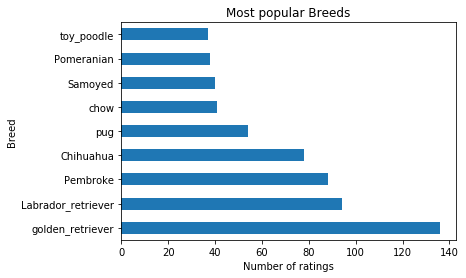

In [909]:
df_final.groupby('breed').filter(lambda x: len(x) >= 30)['breed'].value_counts().plot(kind = 'barh')
plt.title('Most popular Breeds')
plt.xlabel('Number of ratings')
plt.ylabel('Breed')

### Insights:
1. Golden retrievers are the most rated breed, followed by Labrador retrievers

### Research Question 2: what are the most publicly liked dog stages?

Text(0.5, 1.0, 'Dog stages counts')

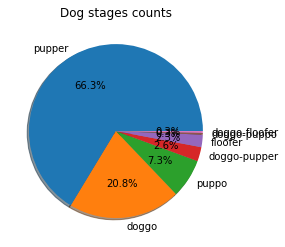

In [910]:
plt.pie(df_final.dog_stage.value_counts(), labels=['pupper', 'doggo', 'puppo', 'doggo-pupper', 'floofer', 'doggo-puppo', 'doggo-floofer'], autopct='%1.1f%%', shadow=True)
plt.title('Dog stages counts')

In [911]:
df_final.groupby('dog_stage').agg({'favorite_count': ['mean', 'min', 'max', np.sum], 'retweet_count': ['mean', 'min', 'max', np.sum]})

favorite_count                         retweet_count         \
                        mean    min     max      sum          mean    min   
dog_stage                                                                   
doggo           19356.380952   2593  131075  1219452   7125.698413    725   
doggo-floofer   17169.000000  17169   17169    17169   3433.000000   3433   
doggo-pupper    13219.875000   4849   44619   105759   4397.250000   1265   
doggo-puppo     47844.000000  47844   47844    47844  19196.000000  19196   
floofer         13206.000000   2262   33345    92442   4968.714286    496   
pupper           7250.527363    693  106827  1457356   2382.502488    103   
puppo           21582.090909   3277  132810   474806   6473.954545    716   

                              
                 max     sum  
dog_stage                     
doggo          79515  448919  
doggo-floofer   3433    3433  
doggo-pupper   17621   35178  
doggo-puppo    19196   19196  
floofer        18497   34781  
pupper         32883  478883  
puppo          48265  142427

- Let ignore dual dog stages
- 201 puppers were rated followed by 63 doggos
- Puppos average favorite count is 21582 while its 19356 for doggos, 13206 for floofers and only 7250 for puppers

### Insights:
1. It's more likely to rate puppers but they are less well retweeted or even added to favorite.

2. From both favorite count and retweet count, we can conclude that doggos are the most publicly liked dog stage 

### Research Question 3: Are favorite counts corralated with retweet counts?

### Visualization

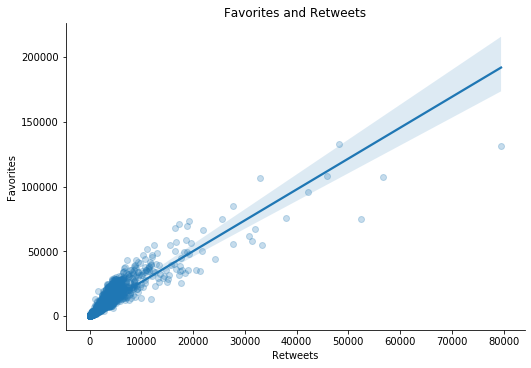

In [912]:
sns.lmplot(x="retweet_count", y="favorite_count", data=df_final, aspect=1.5, scatter_kws={'alpha':0.25});
plt.title('Favorites and Retweets');
plt.xlabel('Retweets');
plt.ylabel('Favorites');

### Insights:
1. There is a positive correlation between favorite counts and retweet counts

### Research Question 4: From which software were the ratings made the most?

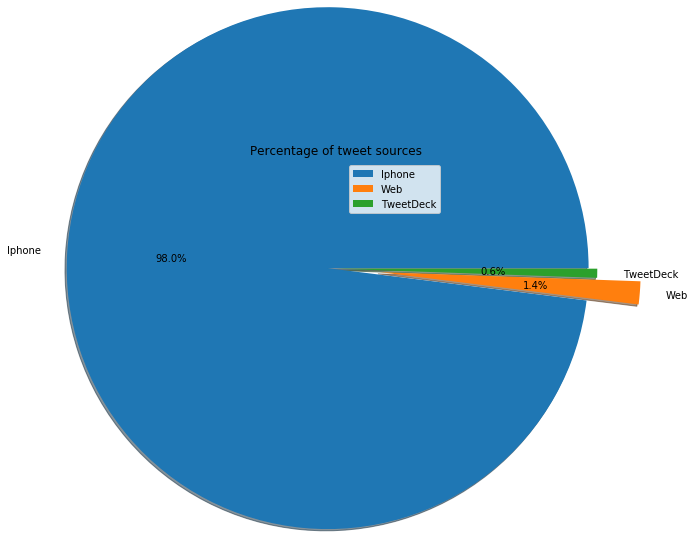

In [913]:
plt.pie(df_final.source.value_counts(), labels=['Iphone', 'Web', 'TweetDeck'], radius=3, autopct='%1.1f%%', shadow=True, explode=(0.1, 0.5, 0.0))
plt.title('Percentage of tweet sources')
plt.legend()

### Insights:
1. Almost the totality of the ratings are made from an Iphone